# Distances between points and objects in space
There are several types of objects where it can be interesting to find the distance between them and a point. Planes and lines are big ones and it is somewhat reasonable to calculate these distances using formulas involving only a little bit of vector manipulation. Finding the distance in other cases, such as between a point and a sphere, can be somewhat more difficult and will probably require more "advanced" tools.

### Distance between points and lines
Finding the distance between a point and a line is not too complicated, but first we need to understand what we mean by finding the distance between a line and a point. A line is composed of an infinitely large set of points, and the distance between the point and many of the points within the set of points that compose the line will be different. When we're talking about the distance between a point and a line, we're usually talking about the shortest distance between the point and the line. For example, consider the case below where we want to find the distance between the vector $<V_x,V_y>$ and the point $(S_x,S_y)$:

In [253]:
%%capture
%matplotlib inline

import numpy
import matplotlib.pyplot

figure1 = matplotlib.pyplot.figure()
axis1 = figure1.add_subplot(111)

axis1.quiver(0, 0, 1, 1, angles='xy', scale_units='xy', scale=1, label='V')
axis1.set_xlim(-2, 2)
axis1.set_ylim(-2, 2)
axis1.plot(0.25, 1, marker='o', color='b', ls='none', label='S')
axis1.plot(0, 0, marker='o', color='g', ls='none', label='O')
axis1.legend(loc='best')

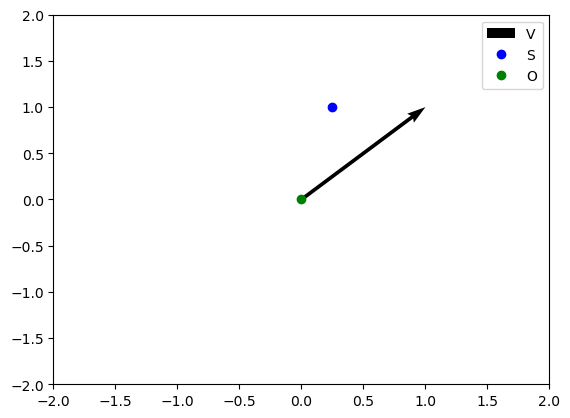

In [254]:
figure1

The shortest distance between the point and the vector is through the following (red) line:

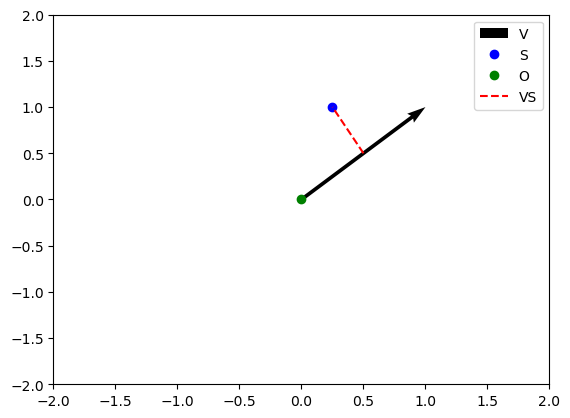

In [255]:
axis1.plot([0.5, 0.25], [0.5, 1], '--', color='r', label='VS')
axis1.legend(loc='best')
figure1

In order to compute the distance between point $s$ and the line created by vector $\vec{V}$ going through the origin, $O$, it helps to create a geometric construction, namely the line between $O$ and $S$:

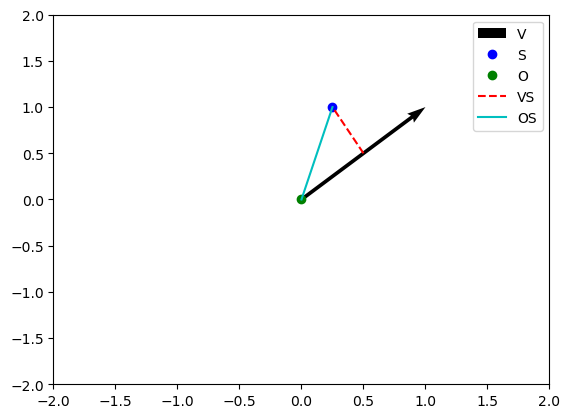

In [256]:
axis1.plot([0,0.25], [0,1], color='c', label='OS')
axis1.legend(loc='best')
figure1

Using some trigonometry, since we know the length of $\vec{OS}$ to be $\left \lVert \vec{OS} \right \rVert = \sqrt{(S_x-O_x)^2+(S_y-O_y)^2}=\sqrt{(S_x)^2+(S_y)^2}$, we can find the length of $\vec{VS}$, which should be $\left \lVert \vec{OS} \right \rVert \sin{\theta}$. But ideally we want to be able to calculate this without having to find $\sin{\theta}$. To do this, we have to do a somewhat nonintuitive transform into the magnitude of the cross product:
$$\left \lVert \vec{OS} \right \rVert \sin{\theta} = \frac{\left \lVert \vec{OS} \right \rVert \left \lVert \vec{V} \right \rVert \sin{\theta}}{\left \lVert \vec{V} \right \rVert}$$
Then, noting that the definition of the cross product is $\vec{A} \times \vec{B} = \left \lVert \vec{A} \right \rVert \left \lVert \vec{B} \right \rVert \sin{\theta} \vec{n}$ where $\theta$ is the angle between the two vectors and $\vec{\hat{n}}$ is the unit vector normal to the plane containing both $\vec{A}$ and $\vec{B}$, we can see that taking the magnitude of the cross product just eliminates the unit normal vector $\vec{\hat{n}}$ since being a unit vector, it will have a magnitude of $1$. In other words:
$$\left \lVert \vec{A} \times \vec{B} \right \rVert = \left \lVert \vec{A} \right \rVert \left \lVert \vec{B} \right \rVert \sin{\theta}$$
The right hand side of that formula is exactly what we were getting before in our distance formula, and thus we can simplify it as follows:
$$\frac{\left \lVert \vec{OS} \right \rVert \left \lVert \vec{V} \right \rVert \sin{\theta}}{\left \lVert \vec{V} \right \rVert} = \frac{\left \lVert \vec{OS} \times \vec{V} \right \rVert}{\left \lVert \vec{V} \right \rVert}$$
This formula also (mostly) works if the vector $\vec{V}$ doesn't go through the origin. Instead of $O$ being the origin point, it would just be another point that $\vec{V}$ goes through, and then your calculations will just continue from there. It would probably be good to change the letter used for the variable from $O$ to something like $P$ given that $O$ is usually reserved for the origin.

### Distance between a point and a plane
We might also be interested in finding the distance between a point and a plane. We can pretty easily accomplish this given the normal vector, $\vec{n}$ to the plane, and a point within the plane, $P$. Let's call the point that we're interested in finding the distance from the plane $S$. This looks like the following:

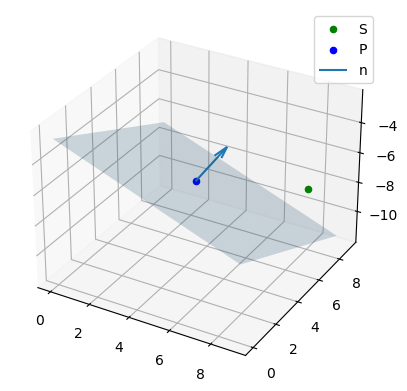

In [257]:
figure2 = matplotlib.pyplot.figure()
axis2 = figure2.add_subplot(111, projection='3d')

normal = numpy.array([1,1,2])
d = 5

x, y = numpy.meshgrid(range(10), range(10))
z = (-normal[0] * x - normal[1] * y - d) * 1. /normal[2]

axis2.plot_surface(x, y, z, alpha=0.2)
axis2.scatter(8, 8, -8, color='g', label='S')
axis2.scatter(4, 5, -7, color='b', label='P')
axis2.quiver(4, 5, -7, 1, 1, 2, label='n')
axis2.legend(loc='best')

Now that we have the basic setup, let's draw the line $PS$, the line perpendicular to the plane that passes through $S$, and the line parallel to the plane through the line defined by the normal vector to $S$:

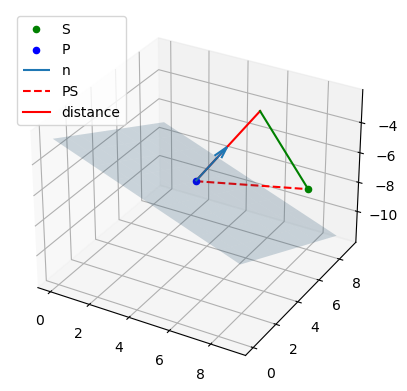

In [258]:
import math

axis2.plot([4,8],[5,8],[-7,-8], '--', color='r', label='PS')
distance = 5/math.sqrt(6)
# going from (4, 5, -7) with length distance * (1,1,2)
axis2.plot([4, 4 + distance * 1], [5, 5 + distance * 1], [-7, -7 + distance * 2], color='r', label='distance')
# going from (8, 8, -8) to (4 + distance, 5 + distance, -7 + distance * 2)
axis2.plot([8, 4 + distance], [8, 5 + distance], [-8, -7 + distance * 2], color='g')
axis2.legend(loc='best')
figure2

Essentially what we want to do is find the magnitude of the distance vector (the solid red line). If we know that the dot product of $\vec{A} \cdot \vec{\hat{B}}$ gives us the magnitude of $\vec{A}$ in the direction of $\vec{B}$, since we know $\vec{PS}$ and $\vec{n}$, we can take the absolute value (since distance should always be a positive value) of the dot product of $\vec{PS}$ and the unit normal vector as follows to get the distance:
$$d=\left \lvert \vec{PS} \cdot \frac{\vec{n}}{\left \lvert \vec{n} \right \rvert} \right \rvert = \left \lvert \vec{PS} \cdot \vec{\hat{n}} \right \vert$$

However, we can also derive this formula using the definition of the dot product being $\vec{a} \cdot \vec{b} = \left \lVert \vec{a} \right \rVert \left \lVert \vec{b} \right \rVert \cos{\theta}$ (where $\theta$ is the angle between the vectors), and some trigonometry. If we redraw the triangle into two dimensions, it looks something like the following (not drawn to scale):

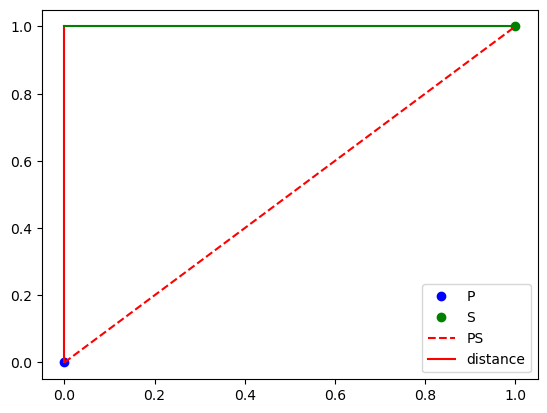

In [267]:
figure3 = matplotlib.pyplot.figure()
axis3 = figure3.add_subplot(111)

axis3.plot(0, 0, marker='o', color='b', label='P', ls='none')
axis3.plot(1, 1, marker='o', color='g', label='S', ls='none')
axis3.plot([0, 1], [0, 1], '--', color='r', label='PS')
axis3.plot([0, 0], [0, 1], color='r', label='distance')
axis3.plot([0, 1], [1, 1], color='g')
axis3.legend(loc='best')

Now, conveniently, the angle at point $P$ also happens to be the angle between $P$ and $S$. Using some basic trigonometry, we can say this about the distance, the magnitude of $\vec{PS}$, and the angle between $P$ and $S$:
$$\cos{\theta}=\frac{d}{\left \lVert \vec{PS} \right \rVert}$$
With a little bit of manipulation, with the slightly less obvious one being multplying by the magnitude of the unit normal vector $\vec{\hat{n}}$, which is just one, really leading us to the result:
$$\left \lVert \vec{PS} \right \rVert \cos{\theta} = d$$
$$\left \lVert \vec{\hat{n}} \right \rVert \left \lVert \vec{PS} \right \rVert \cos{\theta} = d$$
The left hand side now matches the definition of the dot product, so we can rewrite it as the following:
$$\vec{\hat{n}} \cdot \vec{PS} = d$$
Except this is slightly incorrect as distance should always be positive:
$$\left \lvert \vec{\hat{n}} \cdot \vec{PS} \right \rvert = d$$
This can also be written as the following:
$$\left \lvert \frac{\vec{n}}{\left \lVert \vec{n} \right \rVert} \cdot \vec{PS} \right \rvert = d$$